**Bank of Baroda Loan Default Prediction**

Description of Data:
Banks run into losses when customers don't pay their loans on time. Because of this, every year, banks have losses in crores, and this also impacts the country's economic growth to a large extent. In this Dataset , we look at various attributes such as funded amount, location, loan, balance, etc., to predict whether a person will be a loan defaulter.
To solve this problem, we  has created a training dataset of 67,463 rows and 35 columns and a testing dataset of 28,913 rows and 34 columns. The dataset demands a few pre-requisite skills like how to handle datasets, underfitting vs overfitting, and the ability to optimize “log_loss” to generalize well on unseen data. 

***Description of Attributes:***

Bank of Baroda Loan Default Prediction
Description of Data:
Banks run into losses when customers don't pay their loans on time. Because of this, every year, banks have losses in crores, and this also impacts the country's economic growth to a large extent. In this Dataset , we look at various attributes such as funded amount, location, loan, balance, etc., to predict whether a person will be a loan defaulter.
To solve this problem, we  has created a training dataset of 67,463 rows and 35 columns and a testing dataset of 28,913 rows and 34 columns. The dataset demands a few pre-requisite skills like how to handle datasets, underfitting vs overfitting, and the ability to optimize “log_loss” to generalize well on unseen data.

**Description of Attributes:**

•	ID: unique ID of representative

•	Loan Amount: loan amount applied

•	Funded Amount: loan amount funded

•	Funded Amount Investor: loan amount approved by the investors

•	Term: term of loan (in months)

•	Batch Enrolled: batch numbers to representatives

•	Interest Rate: interest rate (%) on loan

•	Grade: grade by the bank

•	Sub Grade: sub-grade by the bank

•	Debit to Income: ratio of representative's total monthly debt repayment divided by self-reported monthly income excluding mortgage

•	Delinquency - two years: number of 30+ days delinquency in past 2 - years

•	Inquires - six months: total number of inquiries in last 6 months

•	Open Account: number of open credit line in representative's - credit line

•	Public Record: number of derogatory public records

•	Revolving Balance: total credit revolving balance

•	Revolving Utilities: amount of credit a representative is using - relative to revolving_balance

•	Total Accounts: total number of credit lines available in - representatives credit line

•	Initial List Status: unique listing status of the loan - - W(Waiting), F(Forwarded)

•	Total Received Interest: total interest received till date

•	Total Received Late Fee: total late fee received till date

•	Recoveries: post charge off gross recovery

•	Collection Recovery Fee: post charge off collection fee

•	Collection 12 months Medical: total collections in last 12 months - excluding medical collections

•	Application Type: indicates when the representative is an individual or joint

•	Last week Pay: indicates how long (in weeks) a representative has paid EMI after batch enrolled

•	Accounts Delinquent: number of accounts on which the representative is delinquent

•	Total Collection Amount: total collection amount ever owed

•	Total Current Balance: total current balance from all accounts

•	Total Revolving Credit Limit: total revolving credit limit

•	Loan Status: 1 = Defaulter, 0 = Non-Defaulters





In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data1 = pd.read_csv("/content/train.csv")
data2 = pd.read_csv("/content/test.csv")

pd.set_option('display.max_columns',500)

In [ ]:
data1.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
data1['Payment Plan'].value_counts()

n    67463
Name: Payment Plan, dtype: int64

In [ ]:
data1.drop(['Payment Plan'],axis=1,inplace=True)

In [ ]:
data1['Accounts Delinquent'].value_counts()

0    67463
Name: Accounts Delinquent, dtype: int64

In [ ]:
data1.drop(['Accounts Delinquent'],axis=1,inplace=True)

In [ ]:
data2.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,Home improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,Debt Consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,Verified,Debt consolidation,4.812117,0,0,11,0,553,49.075855,9,w,248.572854,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,33,90825,26145,NaN


In [ ]:
data2.drop(['Payment Plan'],axis=1,inplace=True)

In [ ]:
data2.drop(['Accounts Delinquent'],axis=1,inplace=True)

In [ ]:
data2.drop(['Loan Status'],axis=1,inplace=True)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Loan Title                    67463 non-null  object 
 13  D

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28913 entries, 0 to 28912
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            28913 non-null  int64  
 1   Loan Amount                   28913 non-null  int64  
 2   Funded Amount                 28913 non-null  int64  
 3   Funded Amount Investor        28913 non-null  float64
 4   Term                          28913 non-null  int64  
 5   Batch Enrolled                28913 non-null  object 
 6   Interest Rate                 28913 non-null  float64
 7   Grade                         28913 non-null  object 
 8   Sub Grade                     28913 non-null  object 
 9   Employment Duration           28913 non-null  object 
 10  Home Ownership                28913 non-null  float64
 11  Verification Status           28913 non-null  object 
 12  Loan Title                    28913 non-null  object 
 13  D

In [ ]:
data1.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay                   0
Total Collecti

In [ ]:
data2.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay                   0
Total Collecti

In [ ]:
data1.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Loan Title', 'Debit to Income', 'Delinquency - two years',
       'Inquires - six months', 'Open Account', 'Public Record',
       'Revolving Balance', 'Revolving Utilities', 'Total Accounts',
       'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [ ]:
num_cols = ['Loan Amount', 'Funded Amount','Funded Amount Investor','Interest Rate','Home Ownership','Debit to Income','Revolving Balance','Revolving Utilities','Total Accounts',
            'Total Received Interest','Total Received Late Fee','Recoveries','Collection Recovery Fee','Last week Pay','Total Collection Amount','Total Current Balance','Total Revolving Credit Limit']

In [ ]:
data1[num_cols].describe()

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,6.746300e+04,67463.000000
mean,16848.902776,15770.599114,14621.799323,11.846258,80541.502522,23.299241,7699.342425,52.889443,18.627929,2068.992542,1.143969,59.691578,1.125141,71.163260,146.467990,1.595739e+05,23123.005544
std,8367.865726,8150.992662,6785.345170,3.718629,45029.120366,8.451824,7836.148190,22.539450,8.319246,2221.918745,5.244365,357.026346,3.489885,43.315845,744.382233,1.390332e+05,20916.699999
min,1014.000000,1014.000000,1114.590204,5.320006,14573.537170,0.675299,0.000000,0.005172,4.000000,4.736746,0.000003,0.000036,0.000036,0.000000,1.000000,6.170000e+02,1000.000000
25%,10012.000000,9266.500000,9831.684984,9.297147,51689.843335,16.756416,2557.000000,38.658825,13.000000,570.903814,0.021114,1.629818,0.476259,35.000000,24.000000,5.037900e+04,8155.500000
50%,16073.000000,13042.000000,12793.682170,11.377696,69335.832680,22.656658,5516.000000,54.082334,18.000000,1330.842771,0.043398,3.344524,0.780141,68.000000,36.000000,1.183690e+05,16733.000000
75%,22106.000000,21793.000000,17807.594120,14.193533,94623.322785,30.048400,10184.500000,69.177117,23.000000,2656.956837,0.071884,5.453727,1.070566,105.000000,46.000000,2.283750e+05,32146.500000
max,35000.000000,34999.000000,34999.746430,27.182348,406561.536400,39.629862,116933.000000,100.880050,72.000000,14301.368310,42.618882,4354.467419,166.833000,161.000000,16421.000000,1.177412e+06,201169.000000


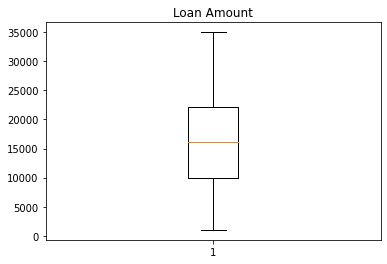

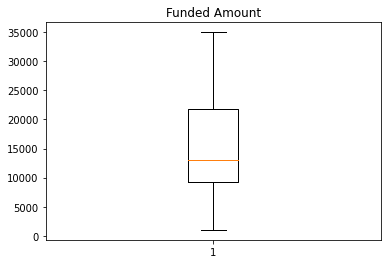

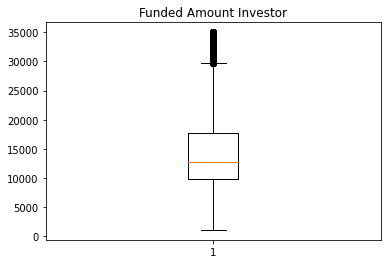

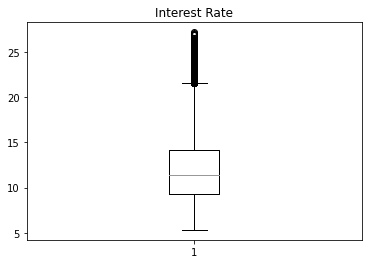

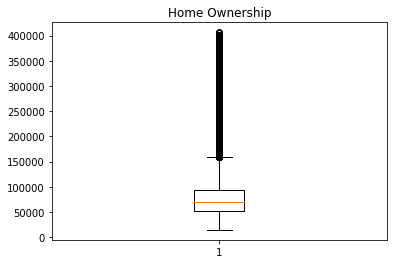

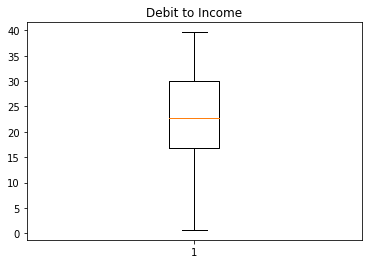

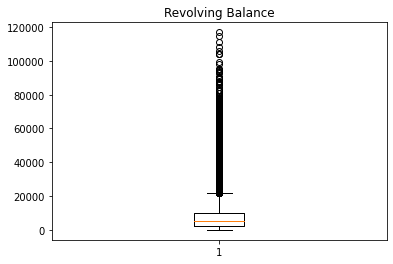

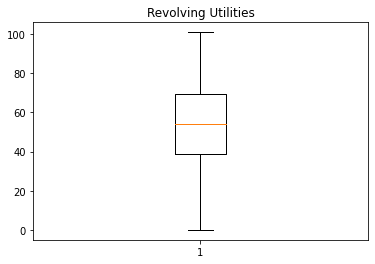

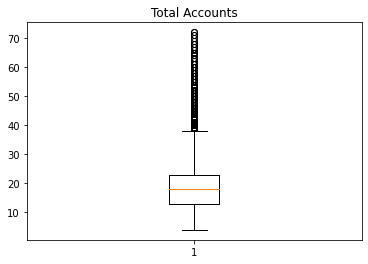

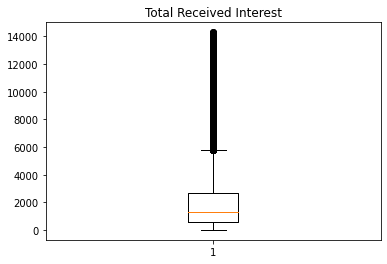

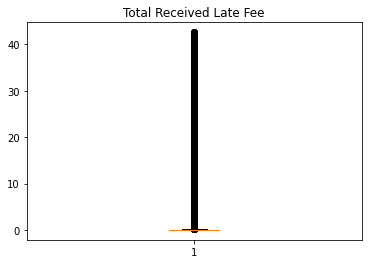

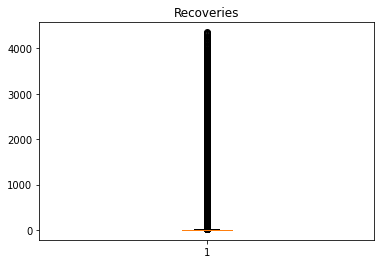

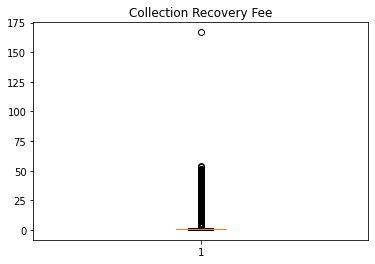

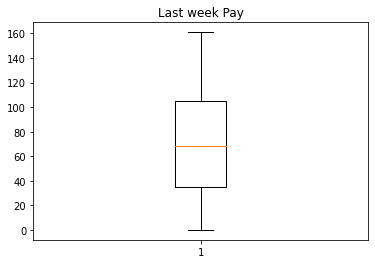

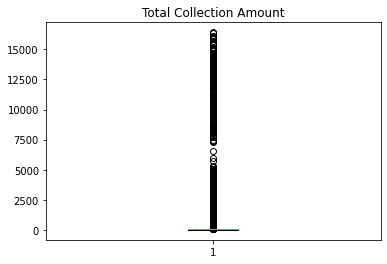

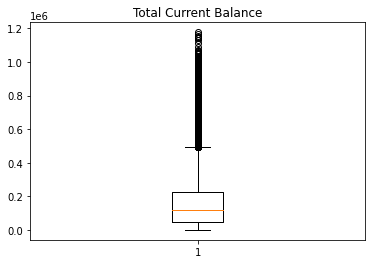

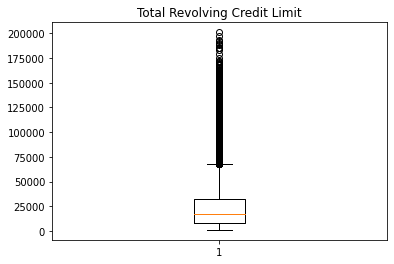

In [ ]:
import matplotlib.pyplot as plt
for i in num_cols:
  plt.boxplot(data1[i])
  plt.title(i)
  plt.show()

In [ ]:
data2[num_cols].describe()

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
count,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,2.891300e+04,28913.000000
mean,16404.027462,15619.911113,14741.536698,12.187577,79983.752348,22.159266,9937.451423,53.860078,20.398540,1917.754435,0.922863,50.624944,1.393220,65.007574,159.747553,1.530975e+05,25013.808425
std,8358.898287,8229.977503,7230.397758,3.911259,45231.316383,8.657629,10931.313717,22.801701,9.650339,2109.442877,4.765042,336.450176,15.139809,42.494090,911.671785,1.391309e+05,22284.519460
min,1000.000000,1000.000000,1000.000000,5.320000,14907.925920,0.730000,0.000000,0.000000,4.000000,4.794657,0.000000,0.000000,0.000000,0.000000,0.000000,6.260000e+02,1000.000000
25%,9776.000000,9175.000000,9695.445501,9.422042,50791.000000,15.622891,3177.000000,38.997949,14.000000,524.130000,0.000000,0.000000,0.000000,29.000000,3.000000,4.397200e+04,9325.000000
50%,15600.000000,13200.000000,12930.601270,11.688652,68894.324470,21.530000,6769.000000,54.867003,19.000000,1216.347147,0.027878,2.165909,0.579620,60.000000,30.000000,1.092860e+05,18848.000000
75%,21651.000000,21552.000000,19226.397540,14.640000,94684.941810,28.840000,12803.000000,70.521791,25.000000,2474.594118,0.061107,4.610188,0.974739,95.000000,44.000000,2.222960e+05,33860.000000
max,35000.000000,35000.000000,35000.000000,27.310000,406944.859000,39.629977,188657.000000,100.799622,73.000000,14313.816110,42.520996,4325.594909,743.166000,161.000000,27076.000000,1.183282e+06,233500.000000


In [ ]:
data1.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Loan Title', 'Debit to Income', 'Delinquency - two years',
       'Inquires - six months', 'Open Account', 'Public Record',
       'Revolving Balance', 'Revolving Utilities', 'Total Accounts',
       'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

<Axes: xlabel='Term', ylabel='count'>

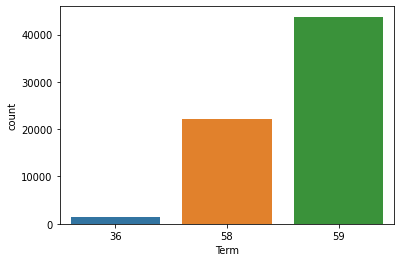

In [ ]:
sns.countplot(x='Term',data=data1)

<Axes: xlabel='Grade', ylabel='count'>

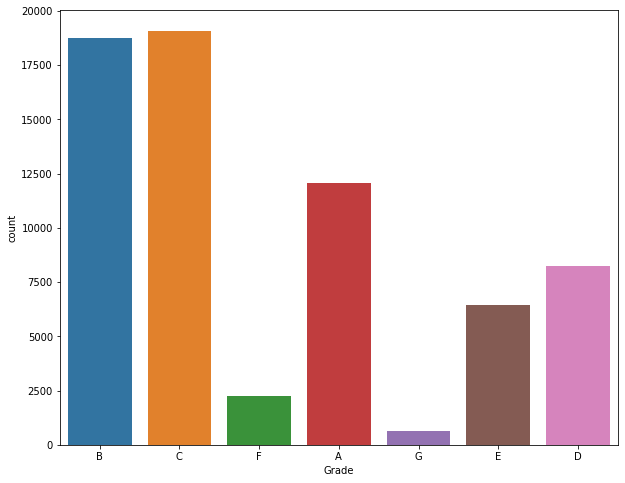

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Grade',data=data1)

<Axes: xlabel='Sub Grade', ylabel='count'>

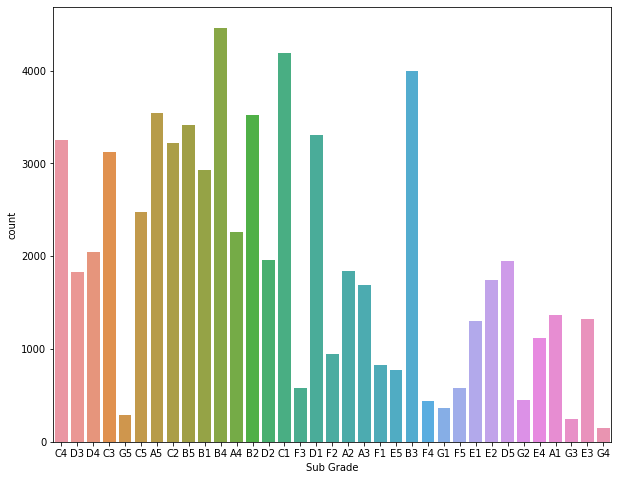

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Sub Grade',data=data1)

<Axes: xlabel='Verification Status', ylabel='count'>

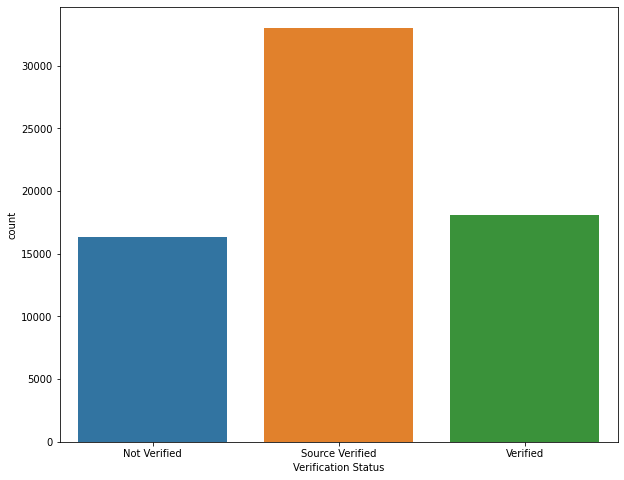

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Verification Status',data=data1)

<Axes: xlabel='Delinquency - two years', ylabel='count'>

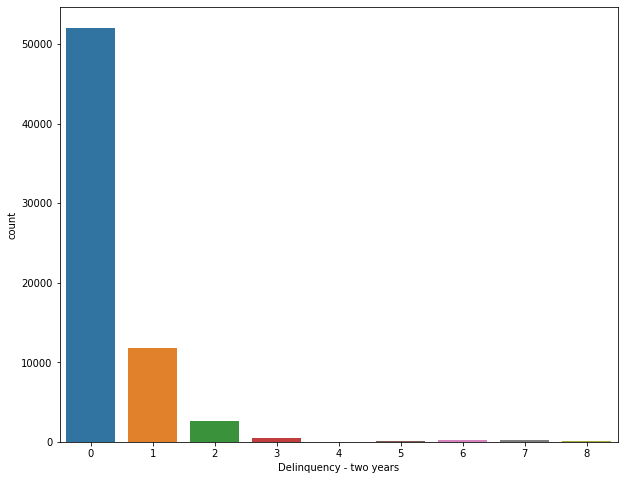

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Delinquency - two years',data=data1)

<Axes: xlabel='Inquires - six months', ylabel='count'>

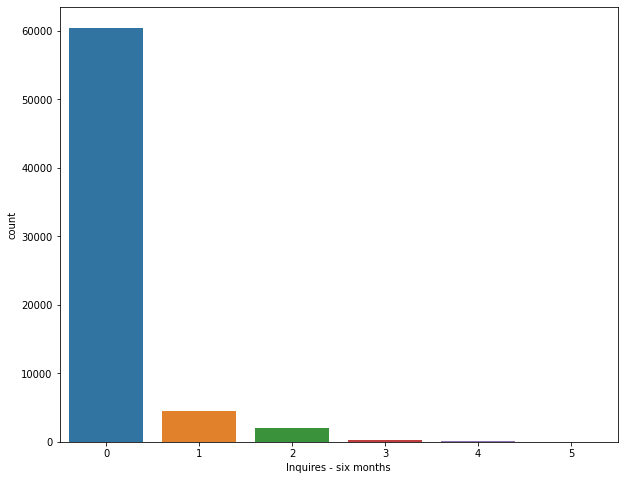

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Inquires - six months',data=data1)

<Axes: xlabel='Public Record', ylabel='count'>

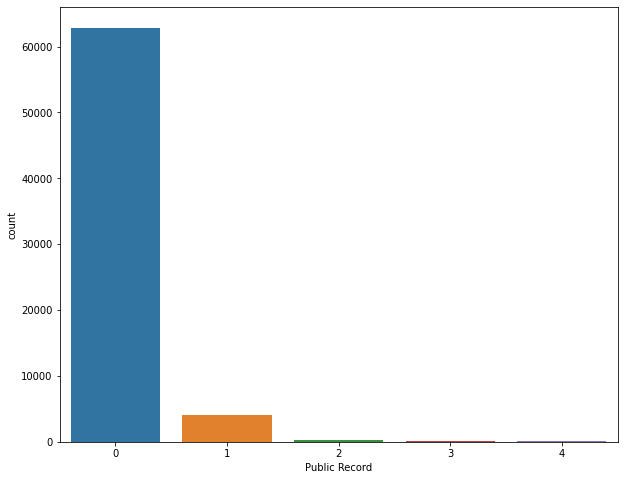

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Public Record',data=data1)

<Axes: xlabel='Collection 12 months Medical', ylabel='count'>

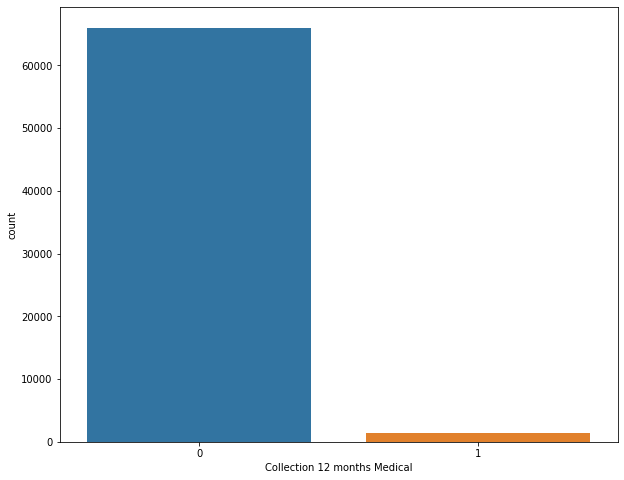

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Collection 12 months Medical',data=data1)

<Axes: xlabel='Application Type', ylabel='count'>

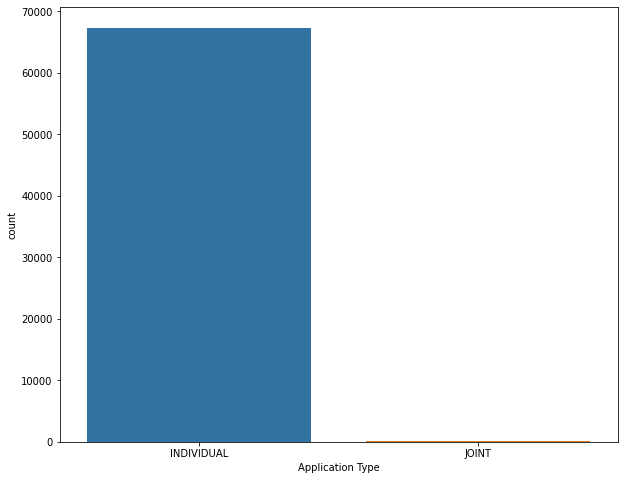

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Application Type',data=data1)

<Axes: xlabel='Loan Status', ylabel='count'>

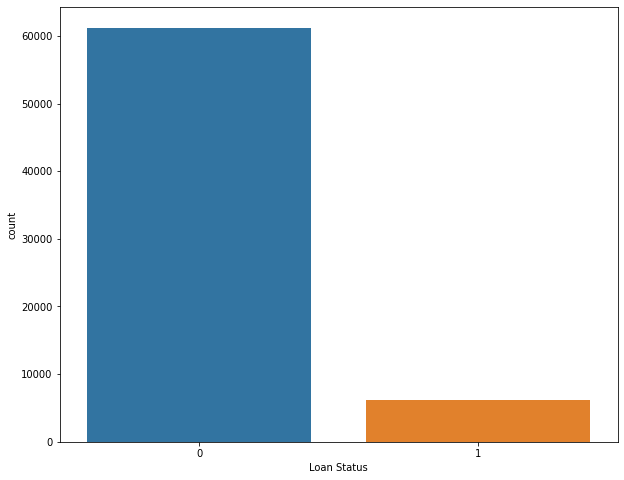

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Loan Status',data=data1)

<ipython-input-95-4a9df0b77c93>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Funded Amount'])


<Axes: xlabel='Funded Amount', ylabel='Density'>

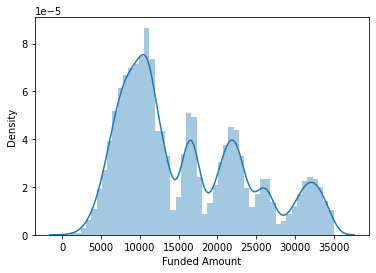

In [ ]:
sns.distplot(data1['Funded Amount'])


<ipython-input-96-2dfb17f2c3bc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Funded Amount Investor'])


<Axes: xlabel='Funded Amount Investor', ylabel='Density'>

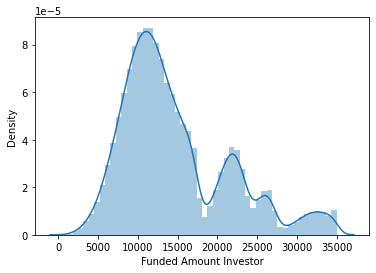

In [ ]:
sns.distplot(data1['Funded Amount Investor'])


<ipython-input-97-2b768bfdbdb2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Total Collection Amount'])


<Axes: xlabel='Total Collection Amount', ylabel='Density'>

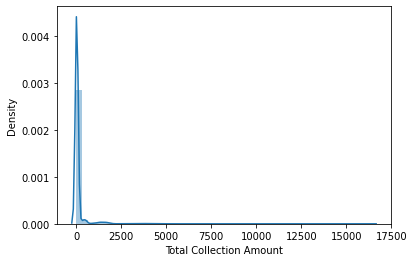

In [ ]:
sns.distplot(data1['Total Collection Amount'])


<ipython-input-98-3db0a2ef3307>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Total Current Balance'])


<Axes: xlabel='Total Current Balance', ylabel='Density'>

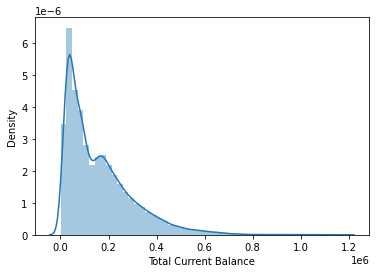

In [ ]:
sns.distplot(data1['Total Current Balance'])


<ipython-input-99-9f78f5243d68>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Total Revolving Credit Limit'])


<Axes: xlabel='Total Revolving Credit Limit', ylabel='Density'>

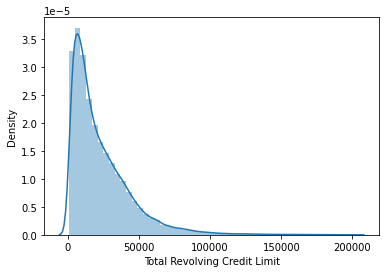

In [ ]:
sns.distplot(data1['Total Revolving Credit Limit'])


In [ ]:
data1.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64
Recoveries                      float64


In [ ]:
data1['Batch Enrolled'].value_counts()

BAT3873588    3626
BAT1586599    3142
BAT1104812    2996
BAT2252229    2557
BAT2803411    2425
BAT1780517    2403
BAT1184694    2298
BAT2078974    2290
BAT2575549    2257
BAT4694572    2248
BAT4271519    2054
BAT2558388    1963
BAT3193689    1864
BAT1930365    1844
BAT2136391    1790
BAT2333412    1775
BAT3726927    1774
BAT4136152    1766
BAT5341619    1717
BAT5525466    1709
BAT5489674    1677
BAT5629144    1639
BAT1766061    1461
BAT2833642    1421
BAT5924421    1404
BAT2522922    1399
BAT2428731    1398
BAT4808022    1303
BAT4351734    1140
BAT5547201    1127
BAT5714674    1105
BAT3461431    1068
BAT224923      895
BAT1761981     894
BAT4722912     887
BAT2003848     842
BAT1467036     802
BAT5849876     768
BAT3865626     728
BAT5811547     711
BAT1135695     296
Name: Batch Enrolled, dtype: int64

In [ ]:
data1['Batch Enrolled'] = data1['Batch Enrolled'].astype('category').cat.codes
data2['Batch Enrolled'] = data2['Batch Enrolled'].astype('category').cat.codes


In [ ]:
data1['Grade'] = data1['Grade'].astype('category').cat.codes
data2['Grade'] = data2['Grade'].astype('category').cat.codes

In [ ]:
data1['Sub Grade'] = data1['Sub Grade'].astype('category').cat.codes
data2['Sub Grade'] = data2['Sub Grade'].astype('category').cat.codes

In [ ]:
data1['Employment Duration'] = data1['Employment Duration'].astype('category').cat.codes
data2['Employment Duration'] = data2['Employment Duration'].astype('category').cat.codes

In [ ]:
data1['Verification Status'] = data1['Verification Status'].astype('category').cat.codes
data2['Verification Status'] = data2['Verification Status'].astype('category').cat.codes

In [ ]:
data1['Loan Title'].value_counts()

Credit card refinancing    30728
Debt consolidation         24841
Debt Consolidation          3544
Other                       2455
Home improvement            2211
                           ...  
Home loan                      6
Personal loan                  5
Getting Ahead                  5
Credit                         4
bills                          4
Name: Loan Title, Length: 109, dtype: int64

In [ ]:
data1['Loan Title'] = data1['Loan Title'].replace('Debt Consolidation','Debt consolidation')

In [ ]:
data1['Loan Title'].value_counts()

Credit card refinancing    30728
Debt consolidation         28385
Other                       2455
Home improvement            2211
Major purchase               487
                           ...  
CC                             6
Personal loan                  5
Getting Ahead                  5
Credit                         4
bills                          4
Name: Loan Title, Length: 108, dtype: int64

In [ ]:
data1['Loan Title'] = data1['Loan Title'].astype('category').cat.codes
data2['Loan Title'] = data2['Loan Title'].astype('category').cat.codes

In [ ]:
data1['Application Type'].value_counts()

INDIVIDUAL    67340
JOINT           123
Name: Application Type, dtype: int64

In [ ]:
data1['Initial List Status'] = data1['Initial List Status'].astype('category').cat.codes
data2['Initial List Status'] = data2['Initial List Status'].astype('category').cat.codes

In [ ]:
data1['Application Type'] = data1['Application Type'].astype('category').cat.codes
data2['Application Type'] = data2['Application Type'].astype('category').cat.codes

In [ ]:
data1.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                     int8
Interest Rate                   float64
Grade                              int8
Sub Grade                          int8
Employment Duration                int8
Home Ownership                  float64
Verification Status                int8
Loan Title                         int8
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status                int8
Total Received Interest         float64
Total Received Late Fee         float64
Recoveries                      float64


In [ ]:
data2.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                     int8
Interest Rate                   float64
Grade                              int8
Sub Grade                          int8
Employment Duration                int8
Home Ownership                  float64
Verification Status                int8
Loan Title                         int8
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status                int8
Total Received Interest         float64
Total Received Late Fee         float64
Recoveries                      float64


In [ ]:
data1.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,16,11.135007,1,13,0,176346.62670,0,48,16.284758,1,0,13,0,24246,74.932551,7,1,2929.646315,0.102055,2.498291,0.793724,0,0,49,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,4,12.237563,2,17,2,39833.92100,1,48,15.412409,0,0,12,0,812,78.297186,13,0,772.769385,0.036181,2.377215,0.974821,0,0,109,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,11,12.545884,5,18,0,91506.69105,1,48,28.137619,0,0,14,0,1843,2.073040,20,1,863.324396,18.778660,4.316277,1.020075,0,0,66,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,15,16.731201,2,12,0,108286.57590,1,48,18.043730,1,0,7,0,13819,67.467951,12,1,288.173196,0.044131,0.107020,0.749971,0,0,39,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,32,15.008300,2,18,0,44234.82545,1,38,17.209886,1,3,13,1,1544,85.250761,22,1,129.239553,19.306646,1294.818751,0.368953,0,0,18,430,126029,22579,0


<Axes: >

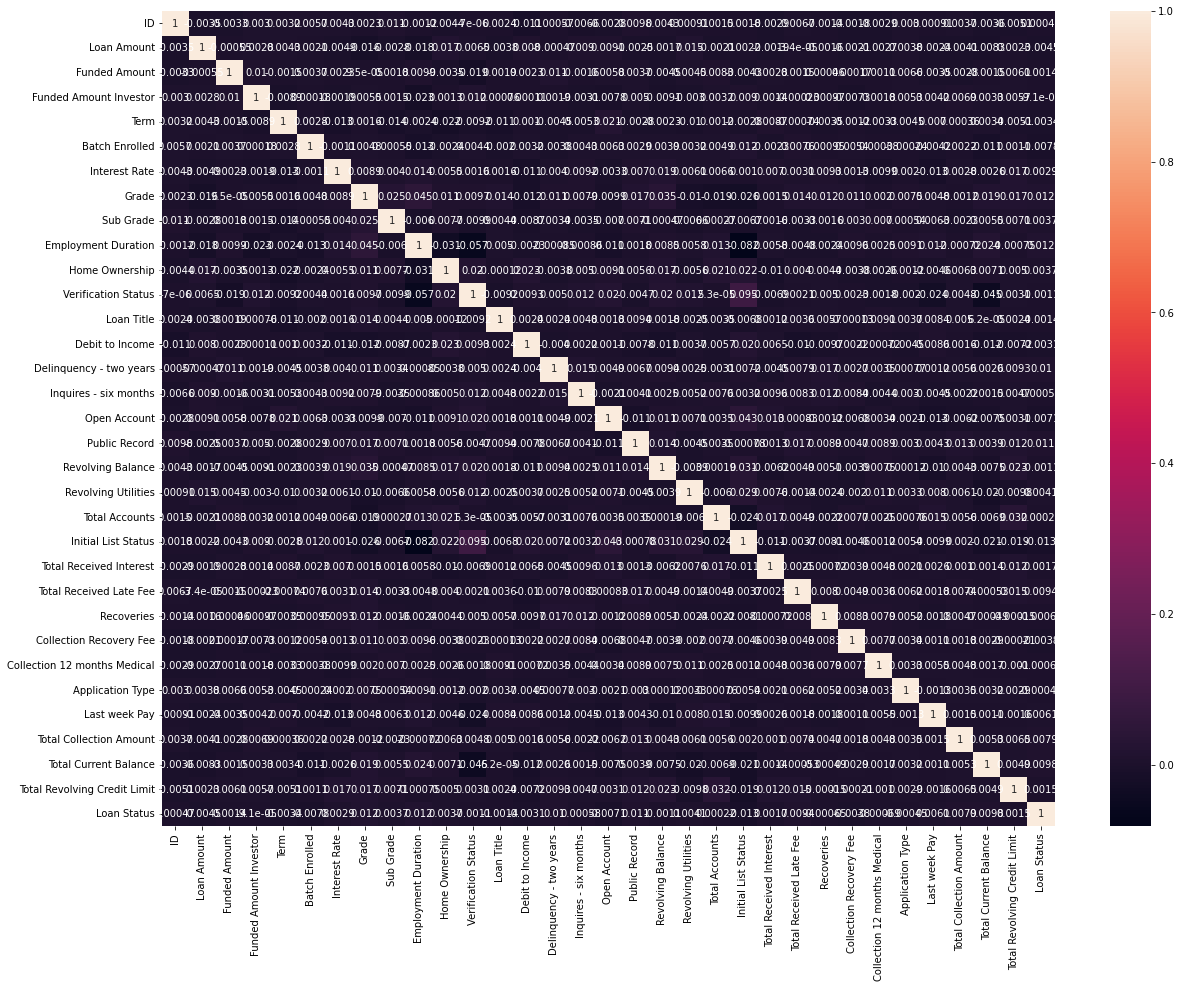

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(data1.corr(),annot=True)